In [1]:
# Pasos tomados:
# 1. https://fortran-lang.org/en/learn/os_setup/install_gfortran/
# 2. https://www.youtube.com/watch?v=RrsoM6wVEWE&t=317s
# 3. Installing: 
#       conda install numpy scipy mkl
#       pip install --upgrade llvmlite

In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np


%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + np.random.randn(size) * sigma

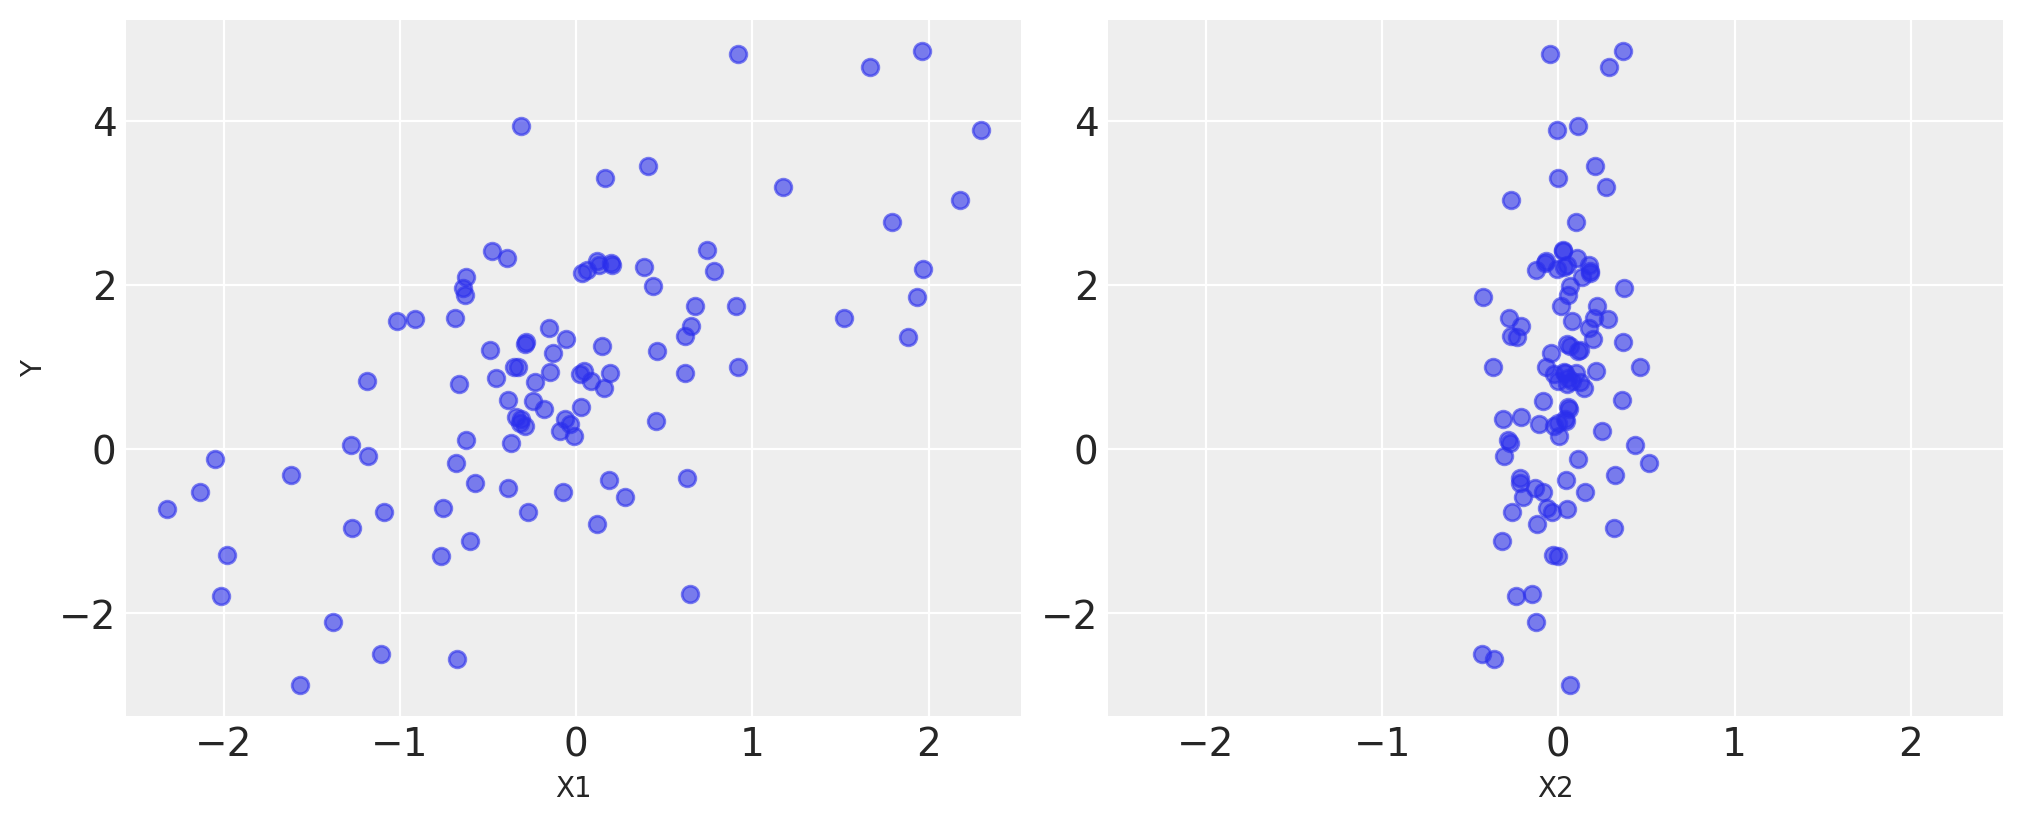

In [4]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

# PYMC3

In [5]:
import pymc3 as pm

print(f"Running on PyMC3 v{pm.__version__}")

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
Running on PyMC3 v3.11.5


In [7]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal(name='alpha', mu=0, sigma=10)
    beta  = pm.Normal(name="beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal(name="sigma", sigma=1)

    # Expected value of outcome
    mu    = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal(name="Y_obs", mu=mu, sigma=sigma, observed=Y)


You can find the C code in this temporary file: C:\Users\MAURICIO\AppData\Local\Temp\theano_compilation_error_jqt30niw


Exception: ("Compilation failed (return status=1): C:\\Users\\MAURICIO\\AppData\\Local\\Temp\\cc2g6eaa.o: In function `run':\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:99: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:158: undefined reference to `__imp_PyExc_NotImplementedError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:124: undefined reference to `__imp_PyExc_ValueError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:130: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:195: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:210: undefined reference to `__imp_PyExc_ValueError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:479: undefined reference to `__imp_PyExc_NotImplementedError'\r. C:\\Users\\MAURICIO\\AppData\\Local\\Temp\\cc2g6eaa.o: In function `_Py_INCREF':\r. c:/Users/MAURICIO/anaconda3/include/object.h:472: undefined reference to `__imp__Py_NoneStruct'\r. C:\\Users\\MAURICIO\\AppData\\Local\\Temp\\cc2g6eaa.o: In function `run':\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:485: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:244: undefined reference to `__imp_PyExc_NotImplementedError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:265: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:173: undefined reference to `__imp_PyExc_TypeError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:179: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:515: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:514: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:516: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:259: undefined reference to `__imp_PyExc_TypeError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:279: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:294: undefined reference to `__imp_PyExc_ValueError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:328: undefined reference to `__imp_PyExc_NotImplementedError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:349: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:216: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:343: undefined reference to `__imp_PyExc_TypeError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:300: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:397: undefined reference to `__imp_PyExc_RuntimeError'\r. C:\\Users\\MAURICIO\\AppData\\Local\\Temp\\cc2g6eaa.o: In function `instantiate':\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:550: undefined reference to `__imp_PyExc_TypeError'\r. C:\\Users\\MAURICIO\\AppData\\Local\\Temp\\cc2g6eaa.o: In function `_import_array':\r. c:/Users/MAURICIO/anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1493: undefined reference to `__imp_PyCapsule_Type'\r. c:/Users/MAURICIO/anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1494: undefined reference to `__imp_PyExc_RuntimeError'\r. C:\\Users\\MAURICIO\\AppData\\Local\\Temp\\cc2g6eaa.o: In function `PyInit_m31975b6dadb59d49af3f2b36405378825884299512ee0ed9081be33fa591d30d':\r. C:/Users/MAURICIO/AppData/Local/Theano/compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_158_Stepping_13_GenuineIntel-3.10.9-64/tmps5ebeh7v/mod.cpp:583: undefined reference to `__imp_PyExc_ImportError'\r. C:\\Users\\MAURICIO\\AppData\\Local\\Temp\\cc2g6eaa.o: In function `_import_array':\r. c:/Users/MAURICIO/anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1525: undefined reference to `__imp_PyExc_RuntimeError'\r. c:/Users/MAURICIO/anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1509: undefined reference to `__imp_PyExc_RuntimeError'\r. c:/Users/MAURICIO/anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1515: undefined reference to `__imp_PyExc_RuntimeError'\r. c:/Users/MAURICIO/anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1537: undefined reference to `__imp_PyExc_RuntimeError'\r. c:/Users/MAURICIO/anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1489: undefined reference to `__imp_PyExc_AttributeError'\r. c:/Users/MAURICIO/anaconda3/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1501: undefined reference to `__imp_PyExc_RuntimeError'\r. collect2.exe: error: ld returned 1 exit status\r. ", 'FunctionGraph(Elemwise{true_div,no_inplace}(TensorConstant{1.0}, TensorConstant{0.01}))')

In [ ]:
map_estimate = pm.find_MAP(model=basic_model)

In [ ]:
map_estimate

In [ ]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(1000, tune=500, return_inferencedata=True)

In [ ]:
trace["alpha"][-5:]

In [ ]:
with basic_model:
    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    trace = pm.sample(5000, step=step, return_inferencedata=False)

In [ ]:
with basic_model:
    az.plot_trace(trace);

In [ ]:
with basic_model:
    display(az.summary(trace, round_to=2))